# 📊 Task 2: Full Quantitative Analysis with OOP & Technical Indicators
This notebook performs detailed financial analysis using `ta` and `pynance`, including trend, momentum, volatility, and volume indicators. Each stock is handled via an OOP class structure for reusability and clarity.

In [1]:
!pip install ta pynance


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 4.7 MB/s eta 0:00:00
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=22f49cee4a8c3ea1bb327a24a5757567636fcfb3ff88b493b60f49599721e1f2
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ta
import pynance as pn
import zipfile, os
from datetime import datetime
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
zip_path = '/content/drive/MyDrive/yfinance_data.zip'
extract_path = '/content/extracted'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [9]:
class StockAnalyzer:
    def __init__(self, ticker, filepath):
        self.ticker = ticker
        self.filepath = filepath
        self.df = None

    def load_and_prepare(self):
        df = pd.read_csv(self.filepath)
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
        df.set_index('Date', inplace=True)
        df.fillna(method='bfill', inplace=True)
        self.df = df

    def apply_indicators(self):
        df = self.df
        # Moving Averages
        df['SMA20'] = ta.trend.sma_indicator(df['Close'], window=20)
        df['SMA50'] = ta.trend.sma_indicator(df['Close'], window=50)
        df['EMA20'] = ta.trend.ema_indicator(df['Close'], window=20)
        df['EMA50'] = ta.trend.ema_indicator(df['Close'], window=50)

        # MACD
        df['MACD'] = ta.trend.macd(df['Close'], window_slow=26, window_fast=12)
        df['MACD_Signal'] = ta.trend.macd_signal(df['Close'], window_sign=9)
        df['MACD_Diff'] = ta.trend.macd_diff(df['Close'], window_slow=26, window_fast=12)

        # RSI
        df['RSI'] = ta.momentum.rsi(df['Close'], window=14)

        self.df = df

    def plot_all(self):
        df = self.df

        def subplot_group(title, series_list, ylabel):
            n = len(series_list)
            fig, axes = plt.subplots(n, 1, figsize=(14, 3 * n), sharex=True)
            fig.suptitle(f"{self.ticker} - {title}", fontsize=16)
            if n == 1:
                axes = [axes]
            for i, series in enumerate(series_list):
                axes[i].plot(df.index, df[series], label=series)
                axes[i].set_ylabel(ylabel)
                axes[i].legend()
                axes[i].grid()
            plt.xlabel("Date")
            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
            plt.show()

        # Only required visualizations
        subplot_group("Price and Moving Averages", ['Close', 'SMA20', 'SMA50', 'EMA20', 'EMA50'], "Price")
        subplot_group("MACD & Histogram", ['MACD', 'MACD_Signal', 'MACD_Diff'], "MACD")
        subplot_group("RSI - Relative Strength Index", ['RSI'], "RSI")

    def save_to_csv(self):
        path = f'/content/drive/MyDrive/{self.ticker}_enriched.csv'
        self.df.to_csv(path)
        print(f"✅ Saved {self.ticker} enriched data to {path}")



Analyzing AMZN


<ipython-input-9-b3e3f9ff58b6>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


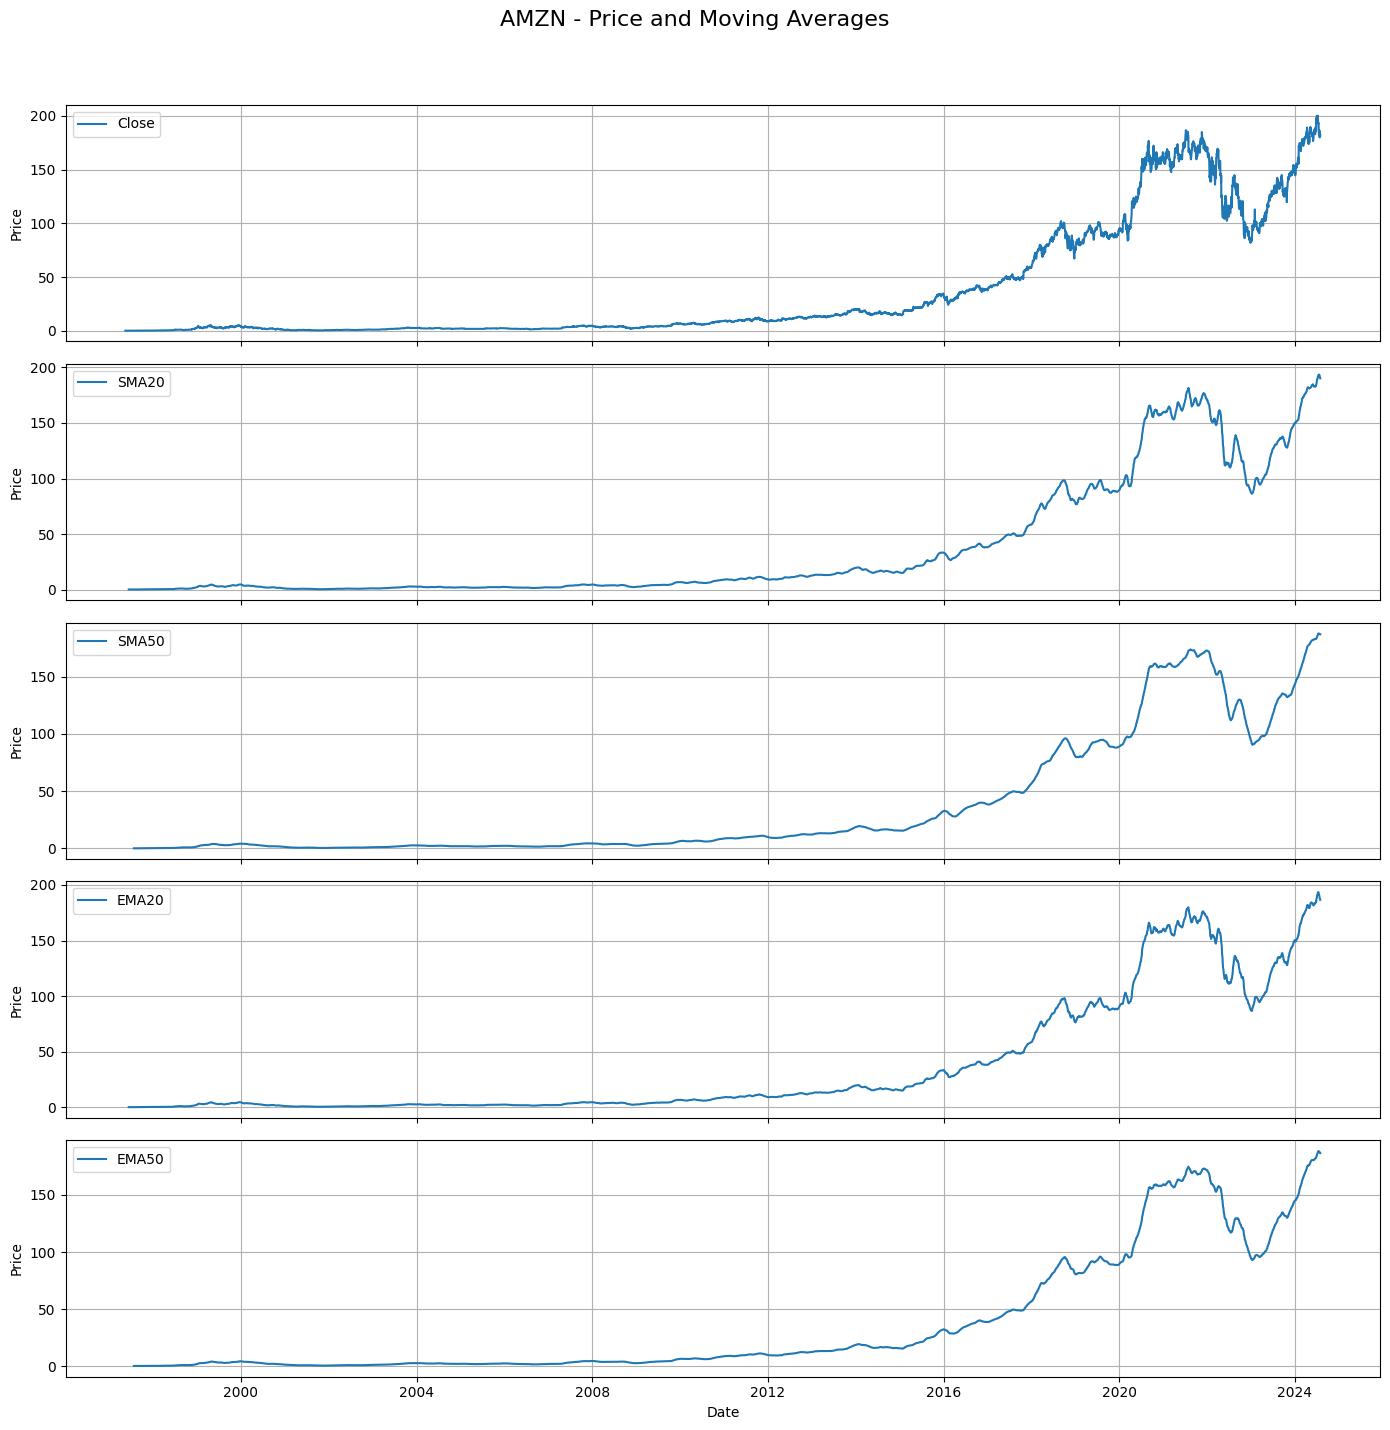

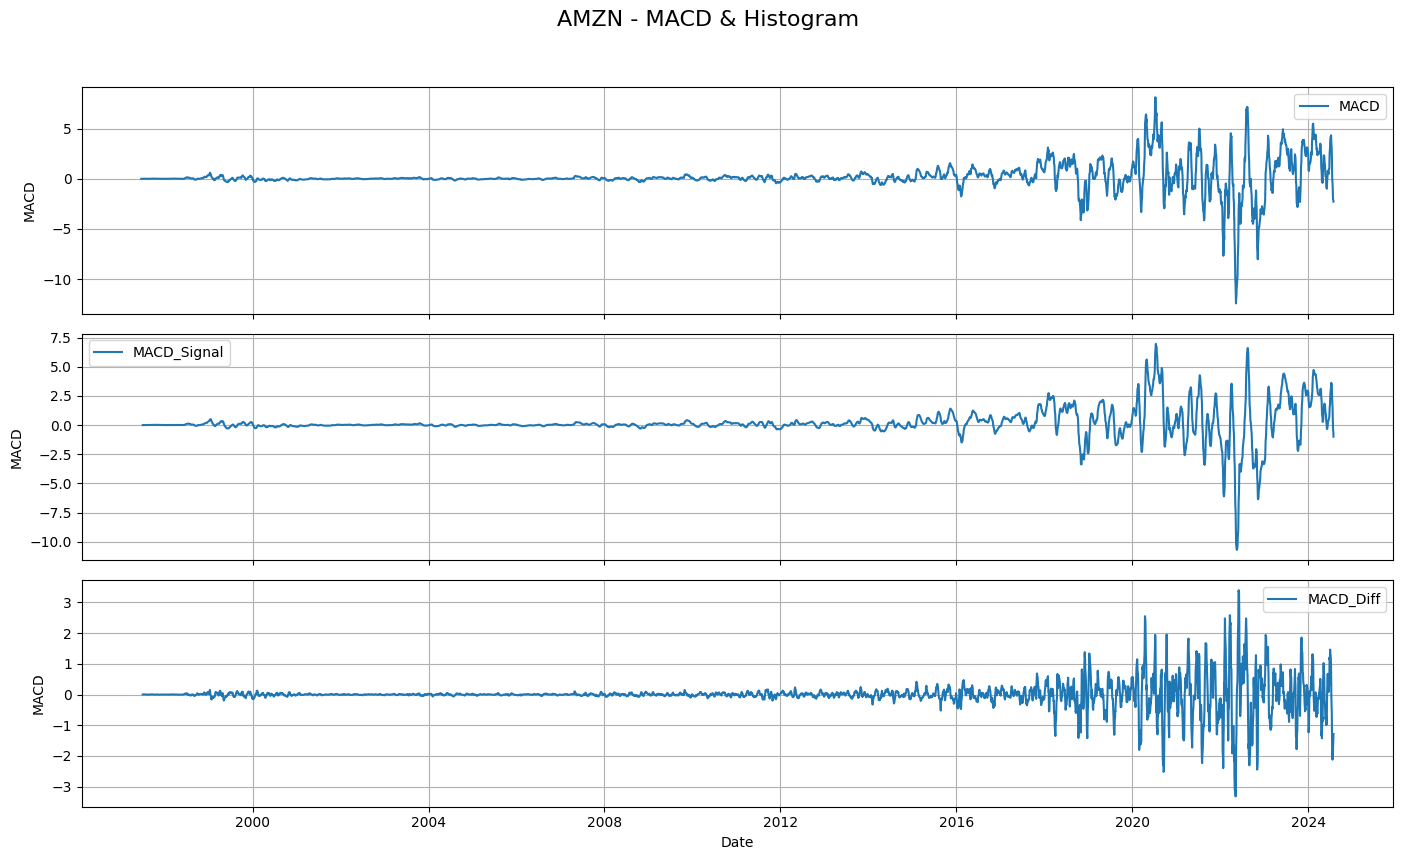

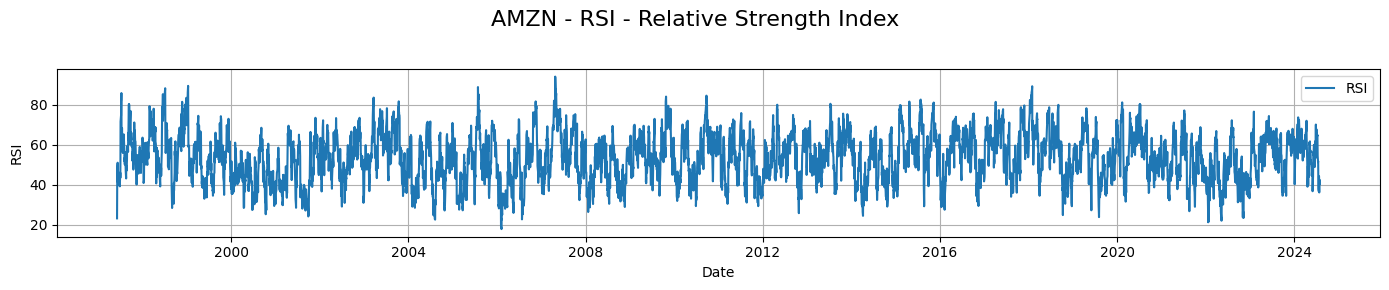

✅ Saved AMZN enriched data to /content/drive/MyDrive/AMZN_enriched.csv

Analyzing NVDA


<ipython-input-9-b3e3f9ff58b6>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


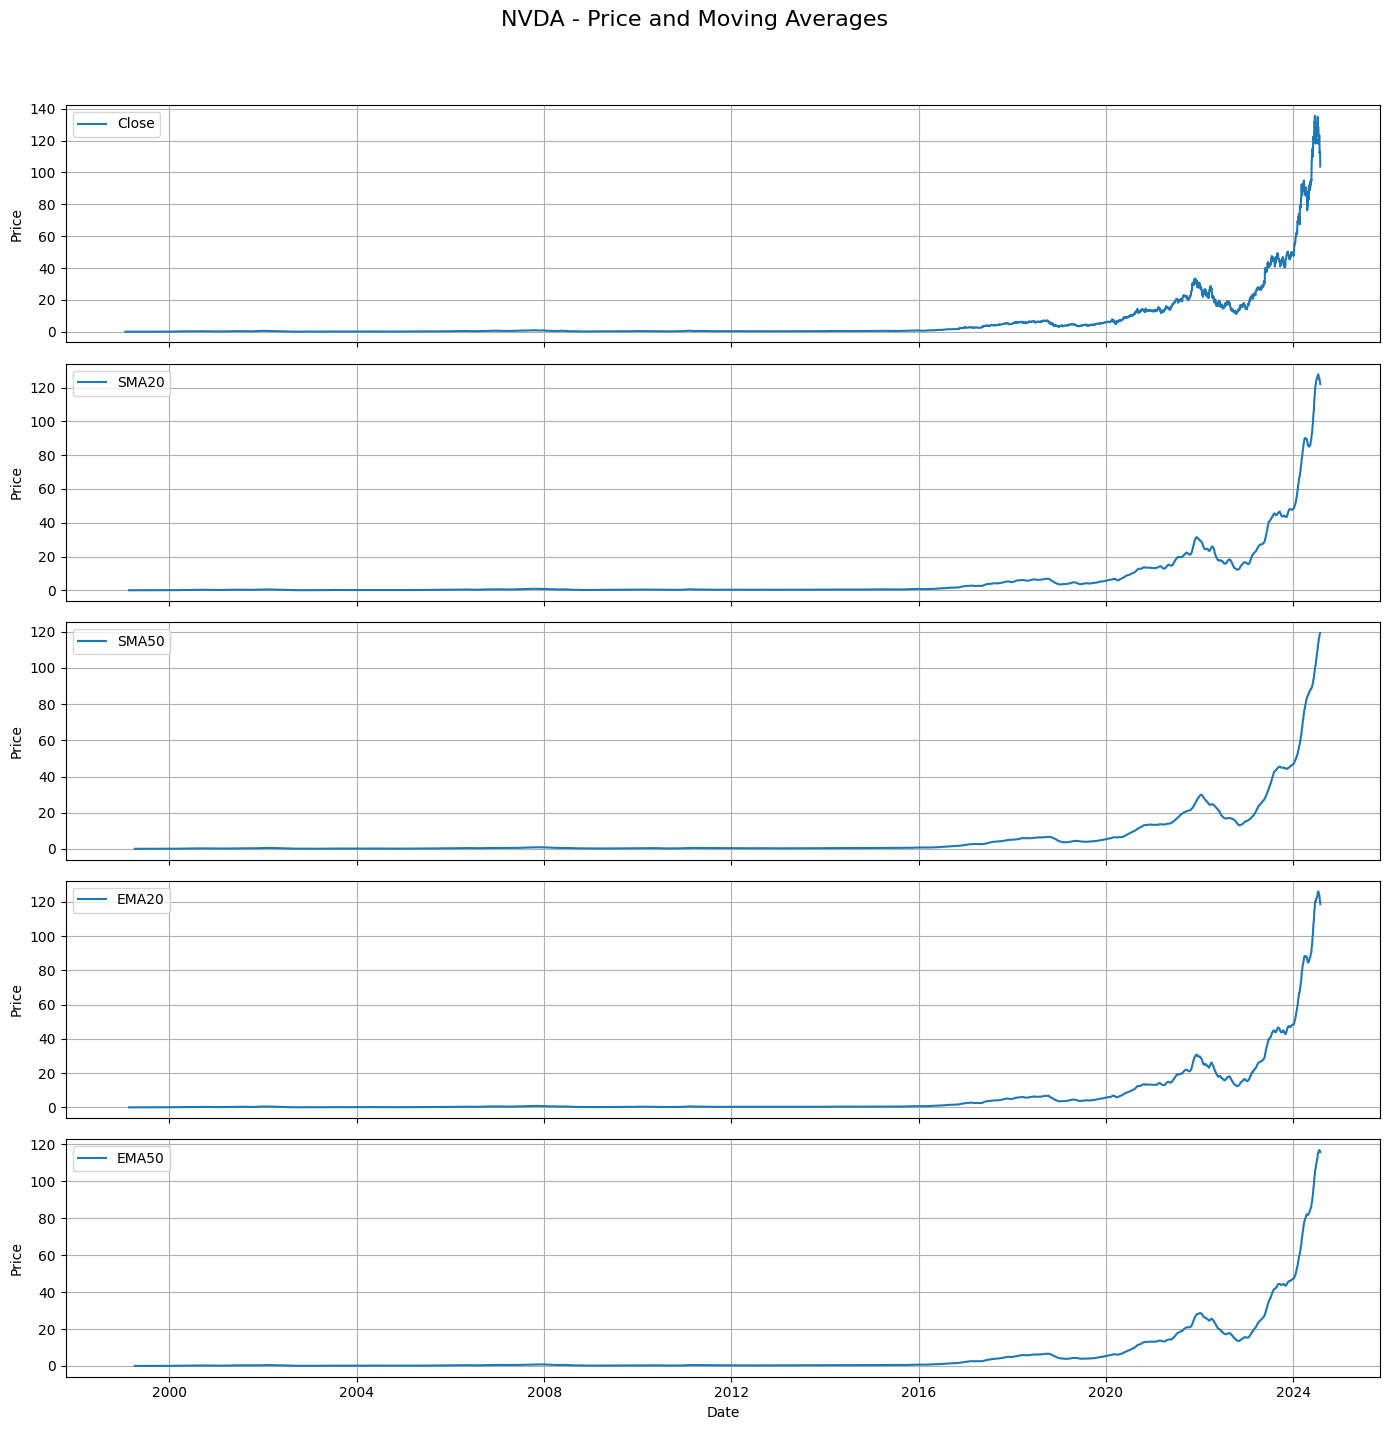

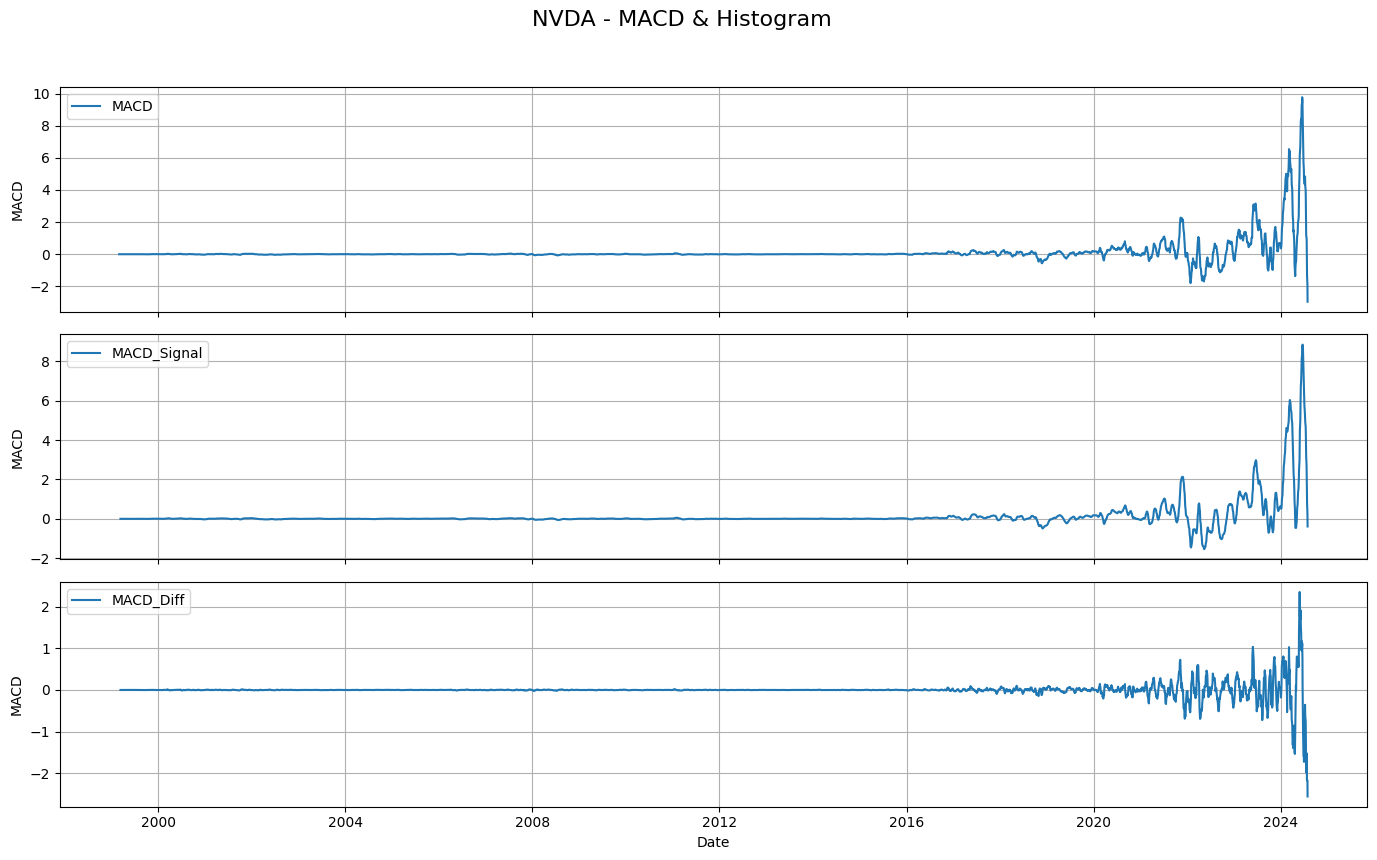

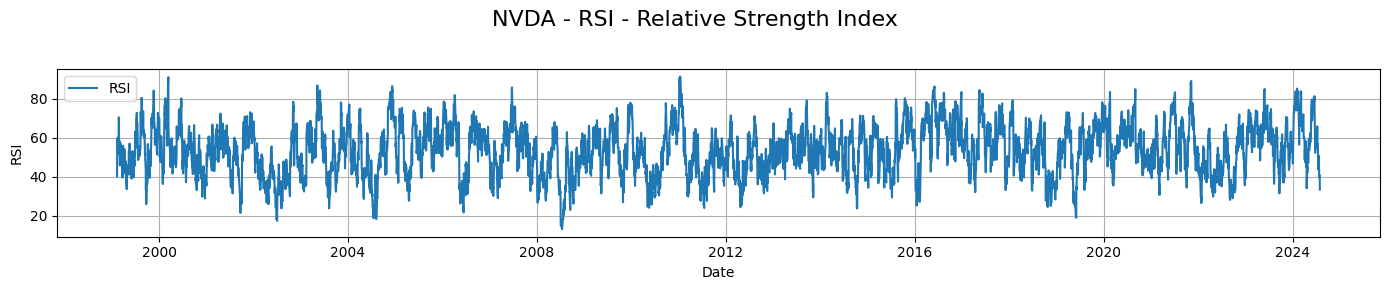

✅ Saved NVDA enriched data to /content/drive/MyDrive/NVDA_enriched.csv

Analyzing TSLA


<ipython-input-9-b3e3f9ff58b6>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


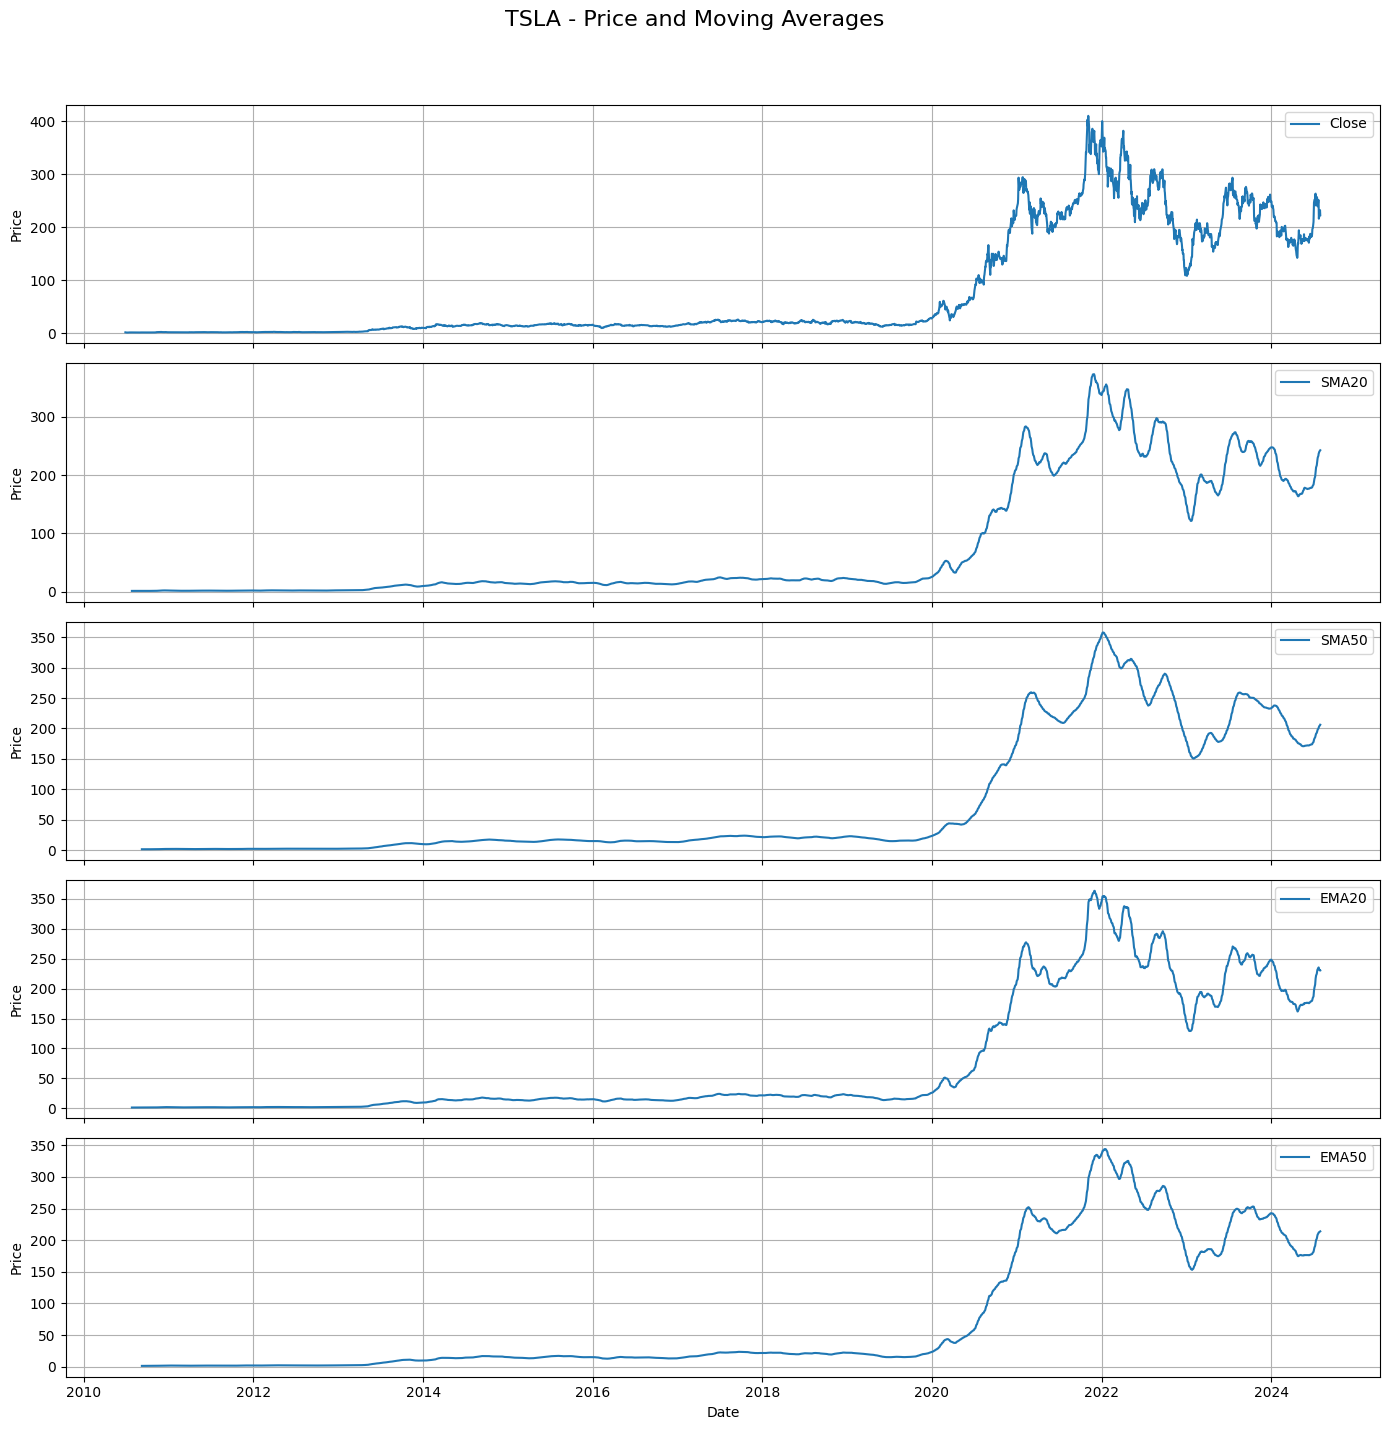

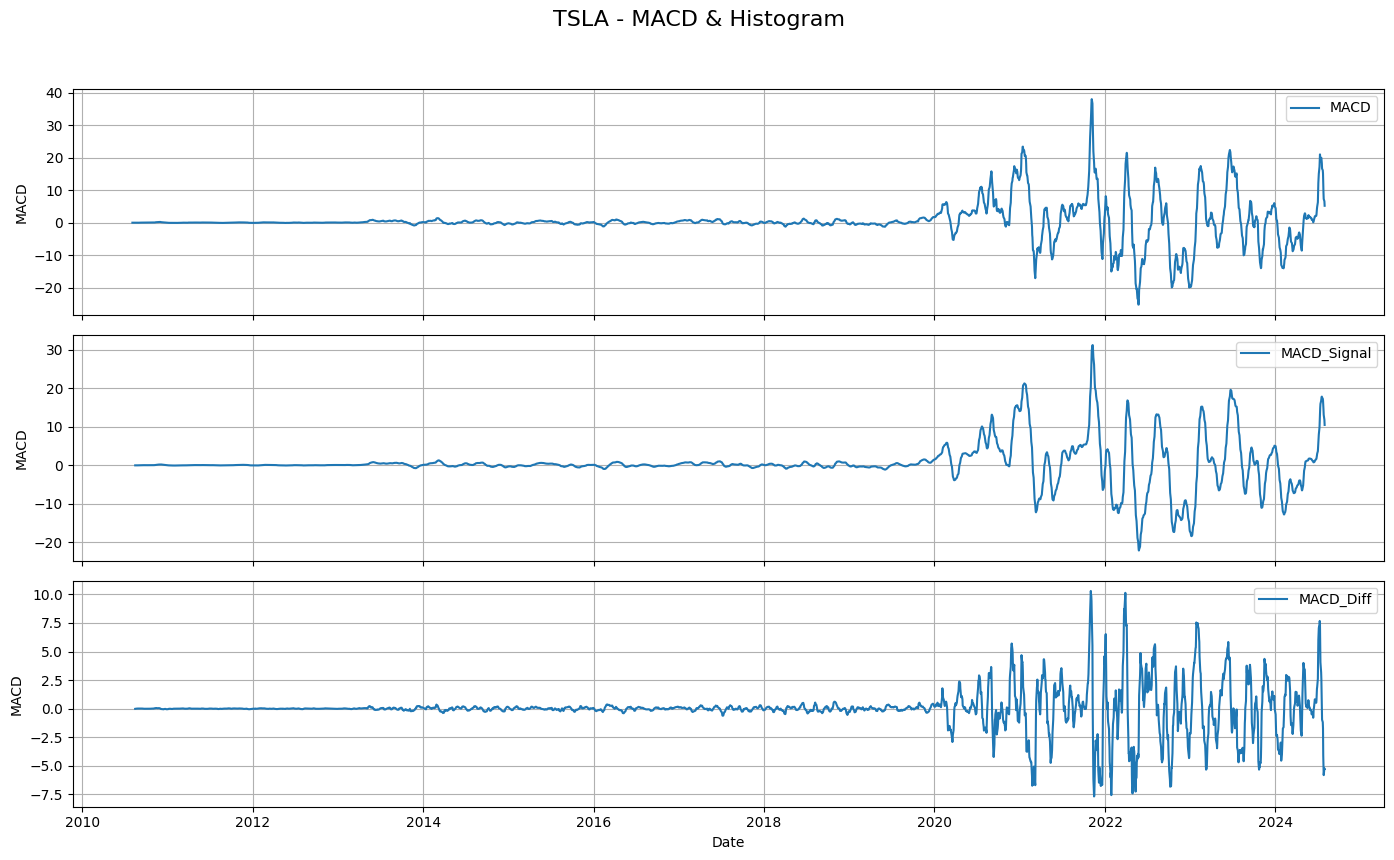

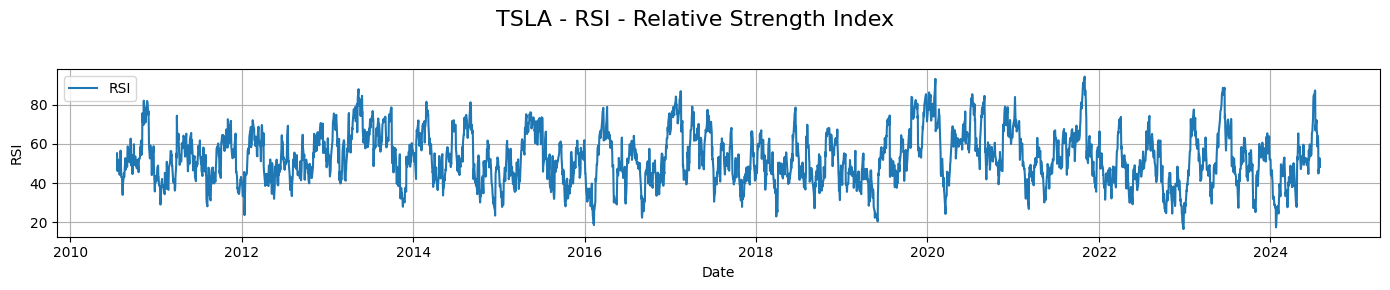

✅ Saved TSLA enriched data to /content/drive/MyDrive/TSLA_enriched.csv

Analyzing META


<ipython-input-9-b3e3f9ff58b6>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


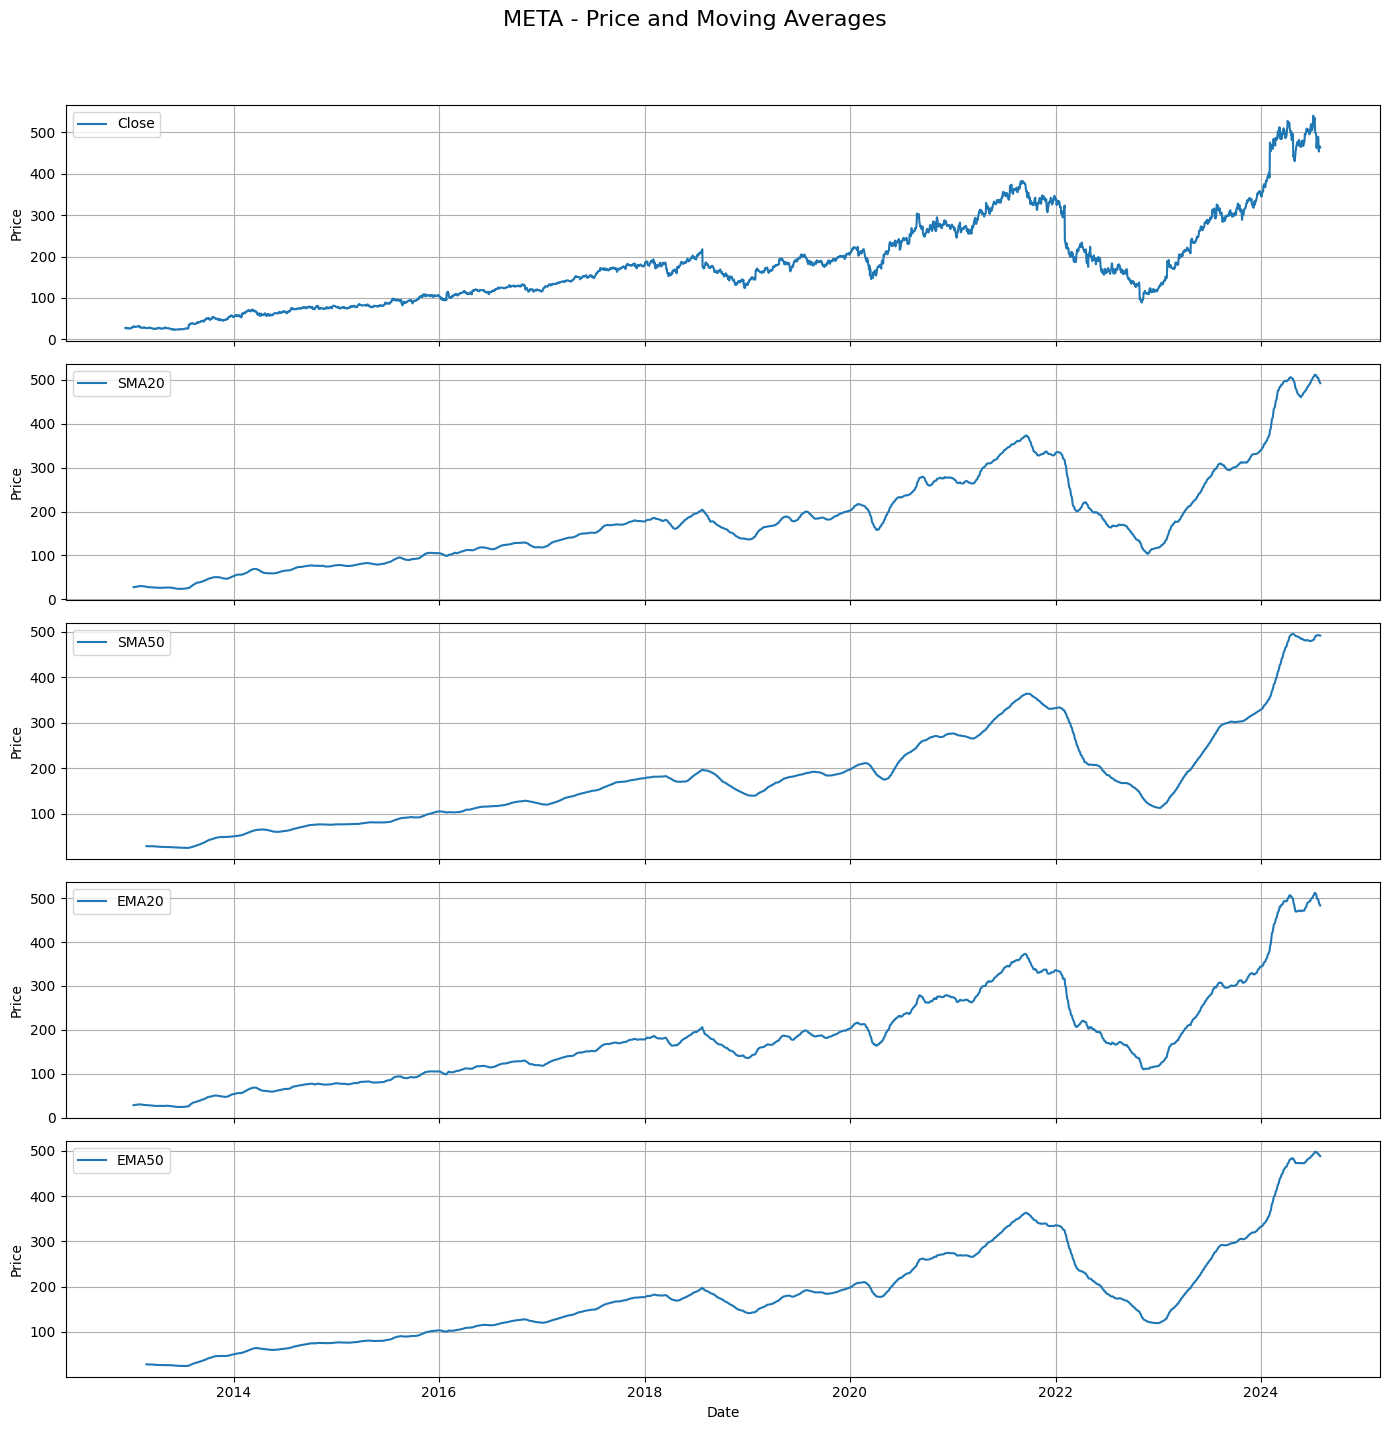

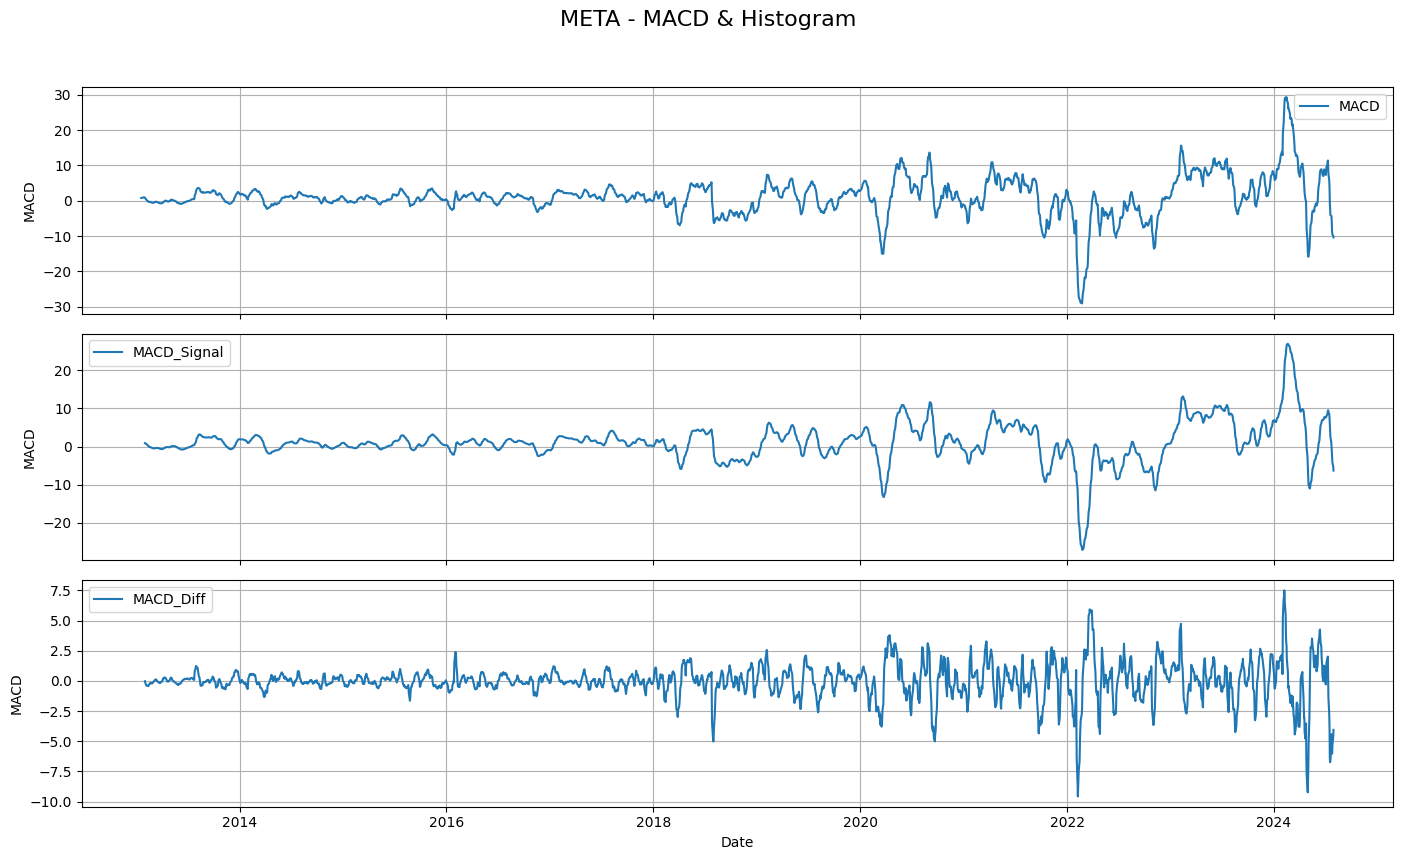

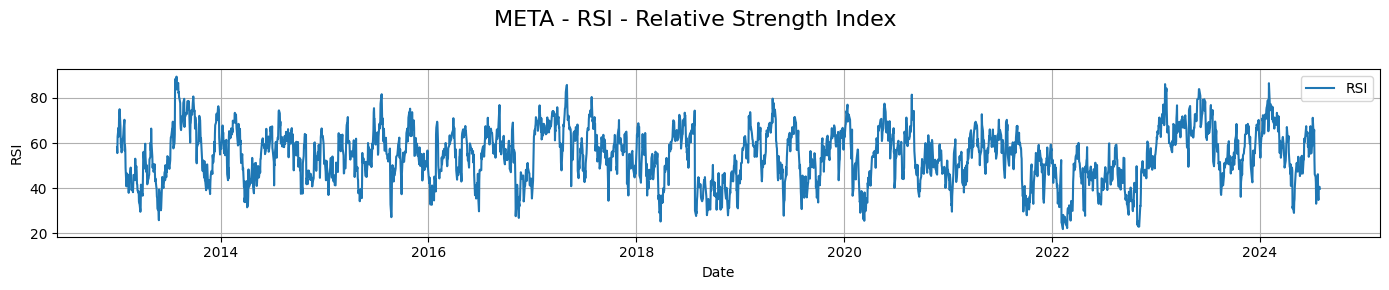

✅ Saved META enriched data to /content/drive/MyDrive/META_enriched.csv

Analyzing GOOG


<ipython-input-9-b3e3f9ff58b6>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


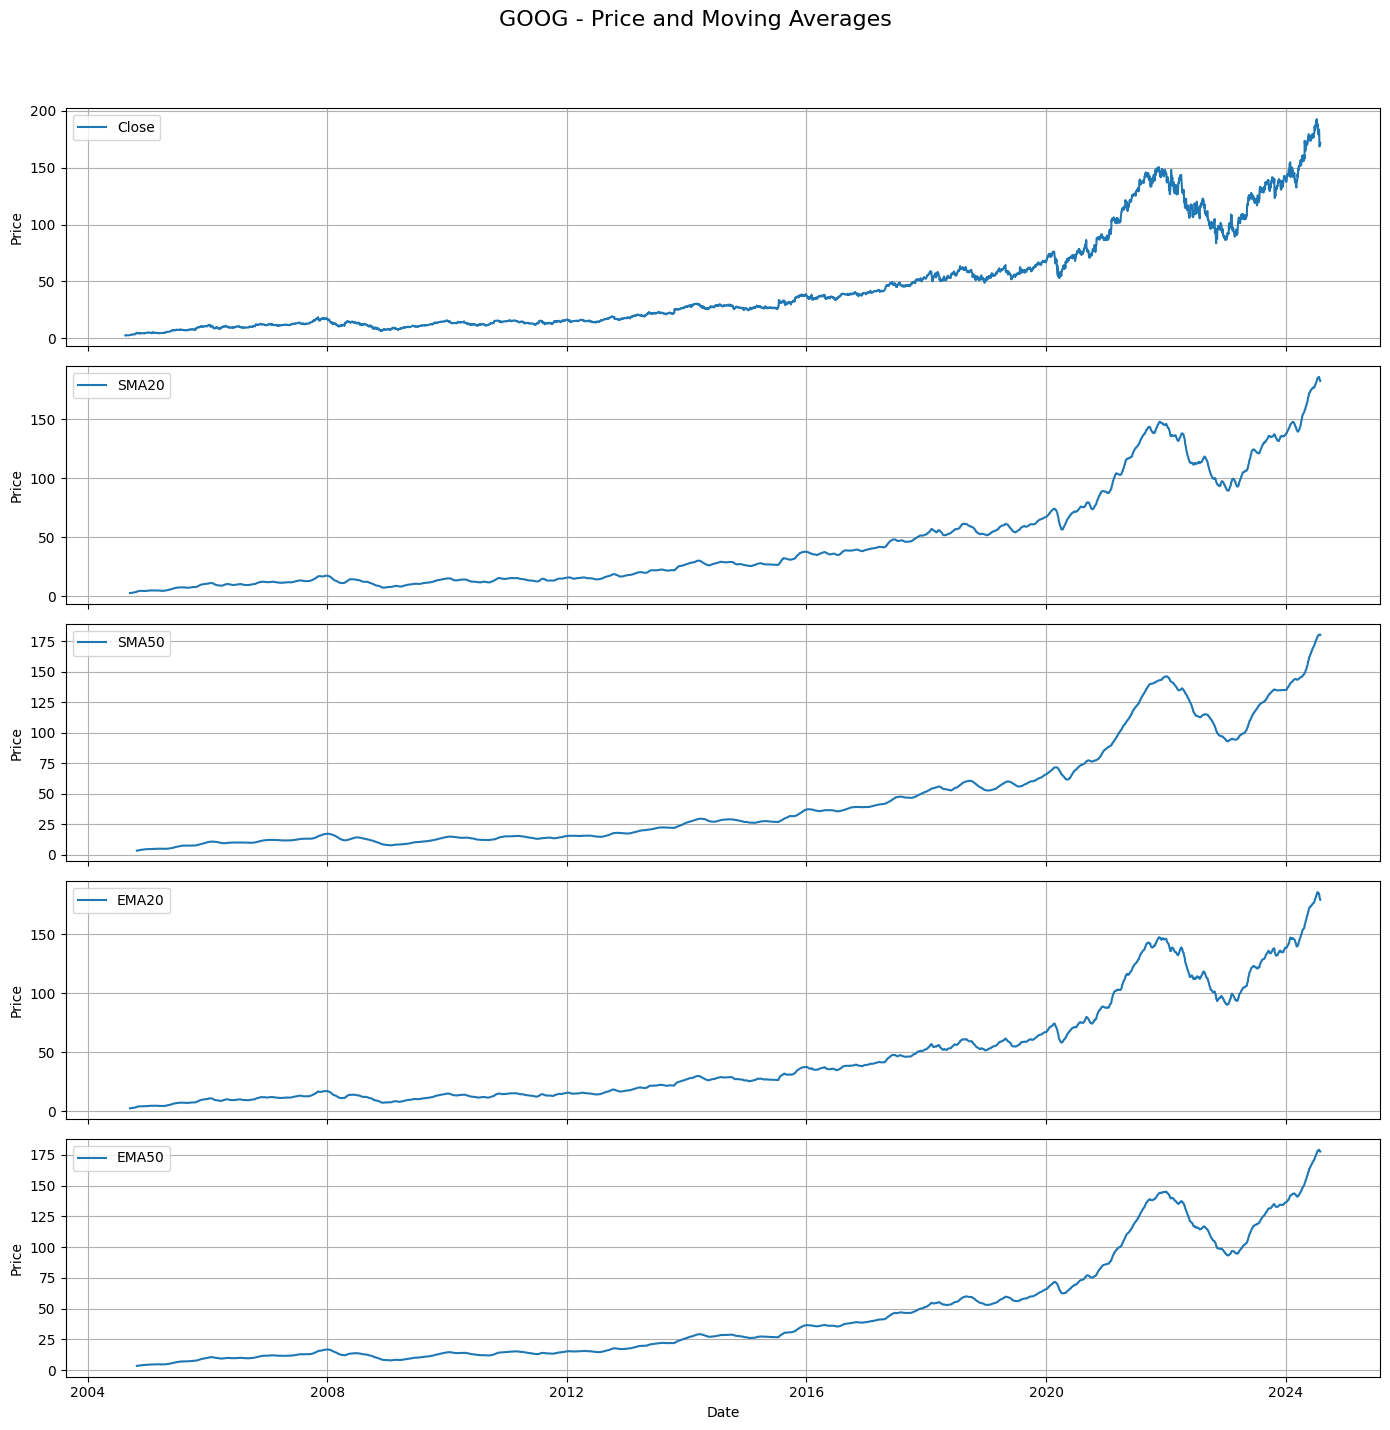

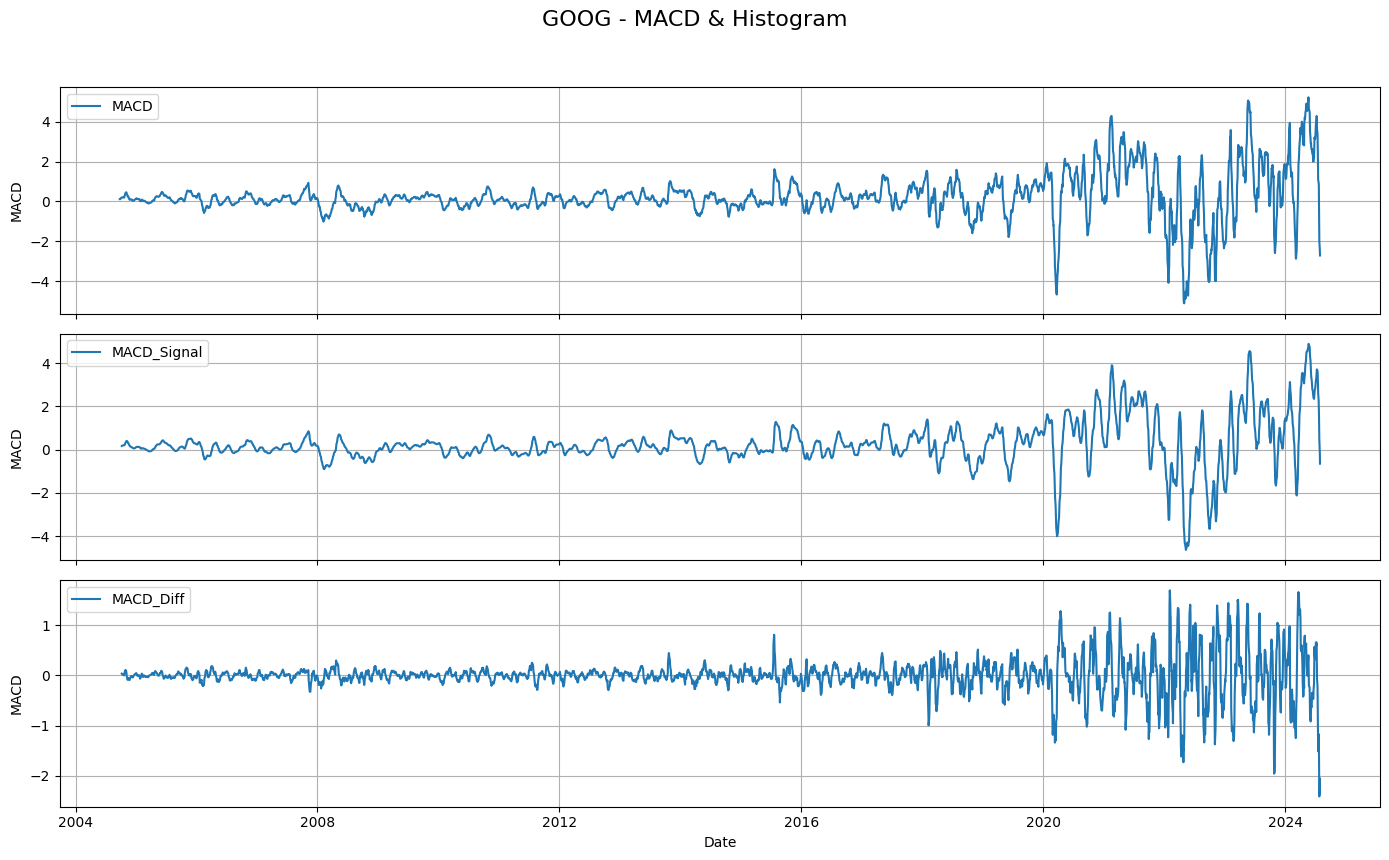

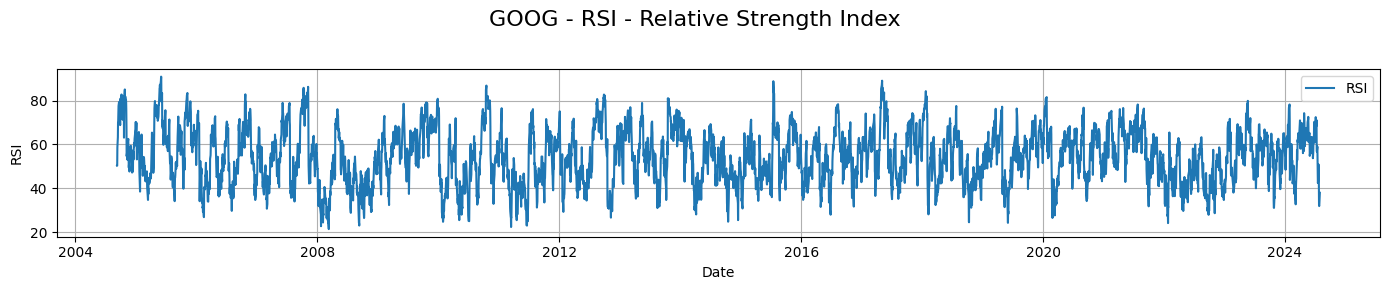

✅ Saved GOOG enriched data to /content/drive/MyDrive/GOOG_enriched.csv

Analyzing AAPL


<ipython-input-9-b3e3f9ff58b6>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


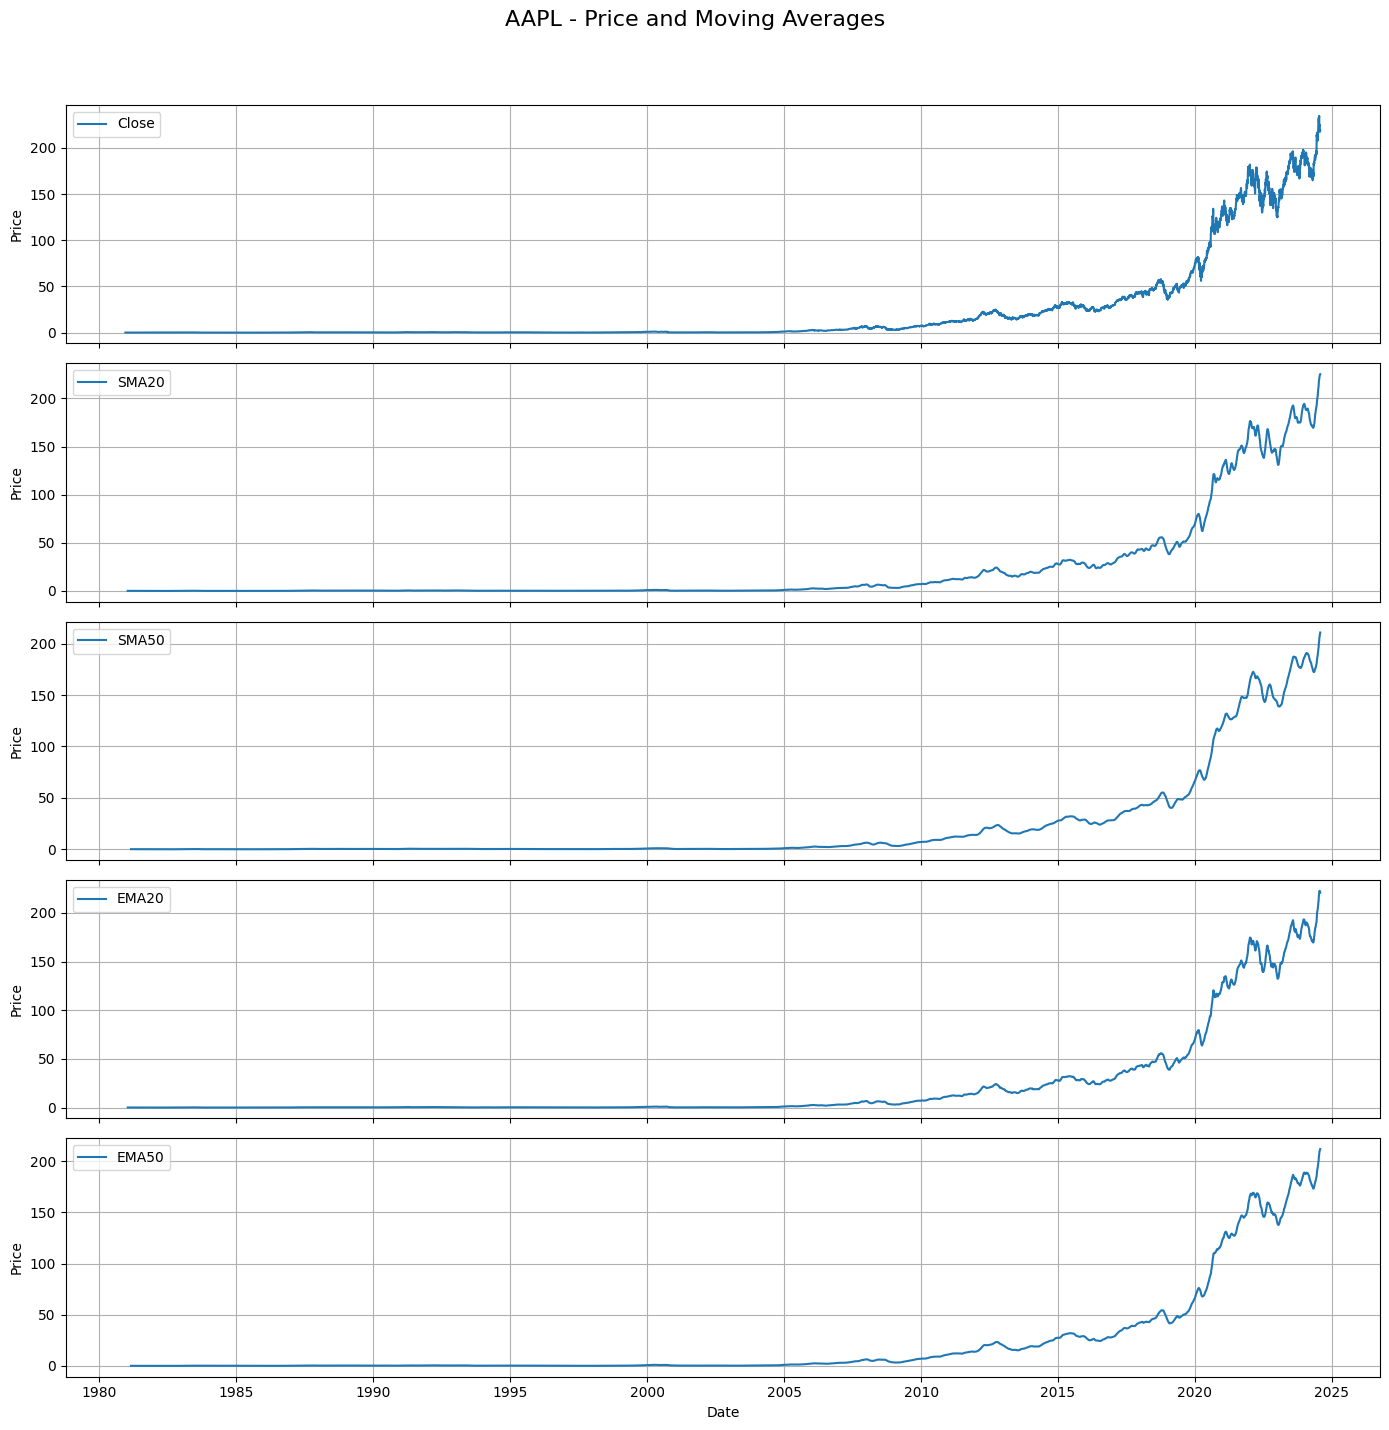

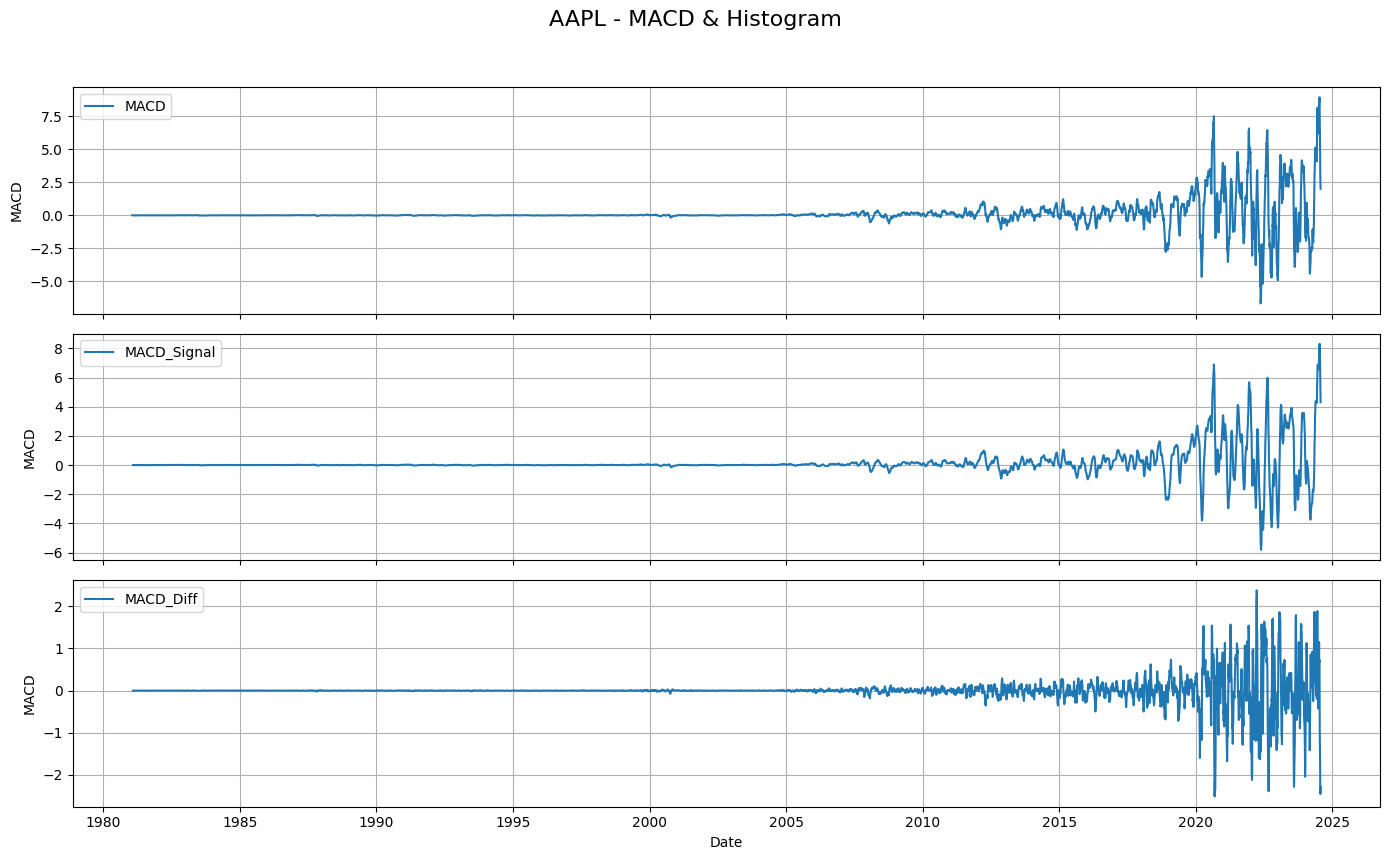

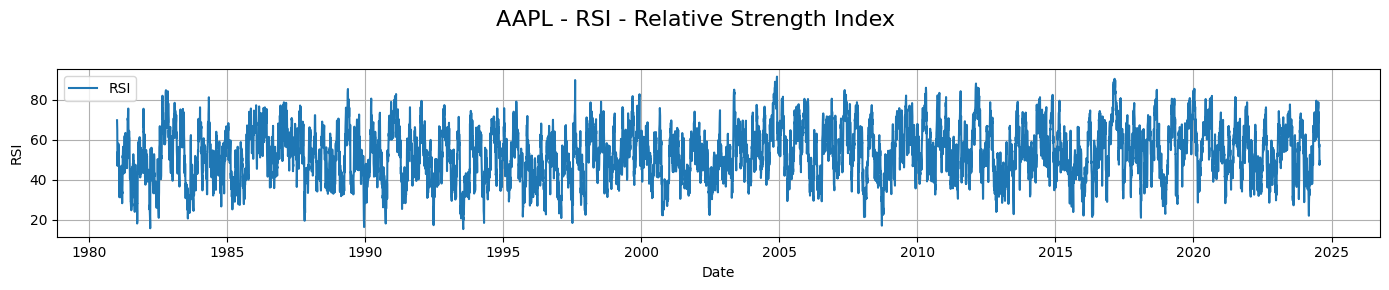

✅ Saved AAPL enriched data to /content/drive/MyDrive/AAPL_enriched.csv

Analyzing MSFT


<ipython-input-9-b3e3f9ff58b6>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


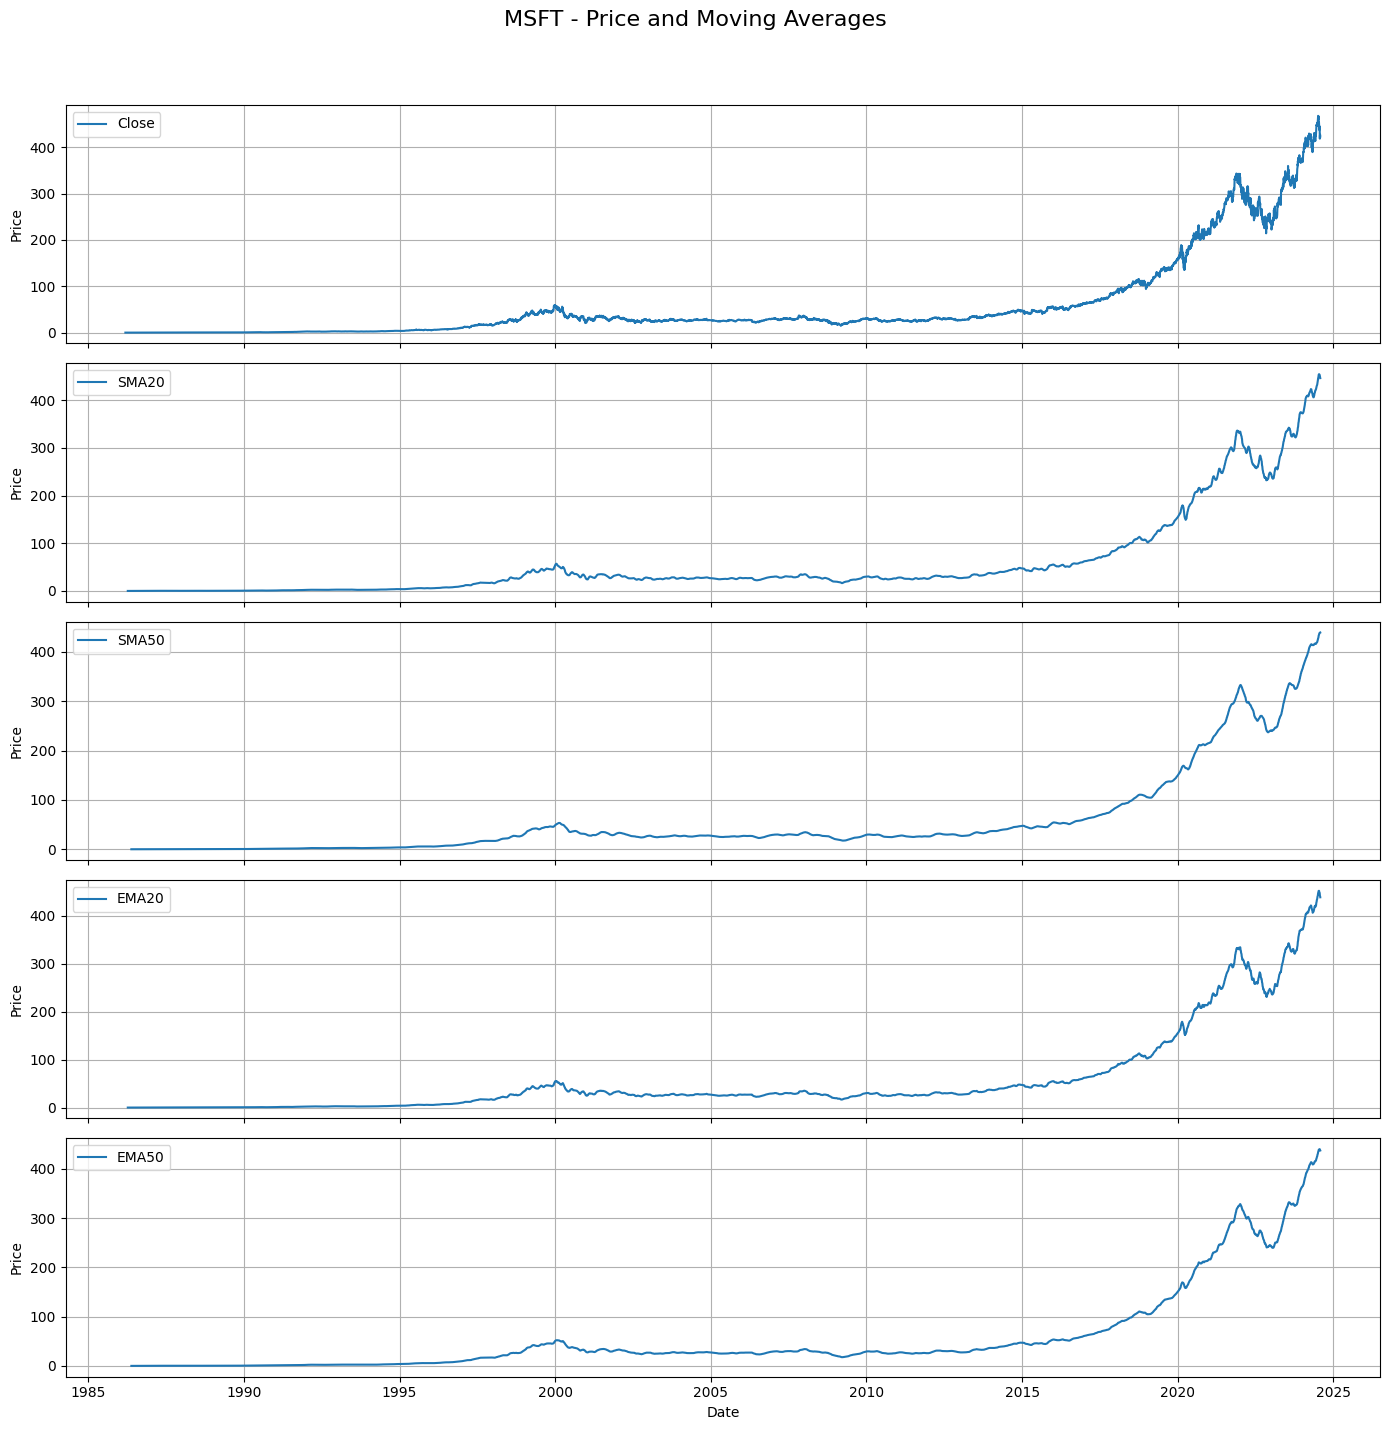

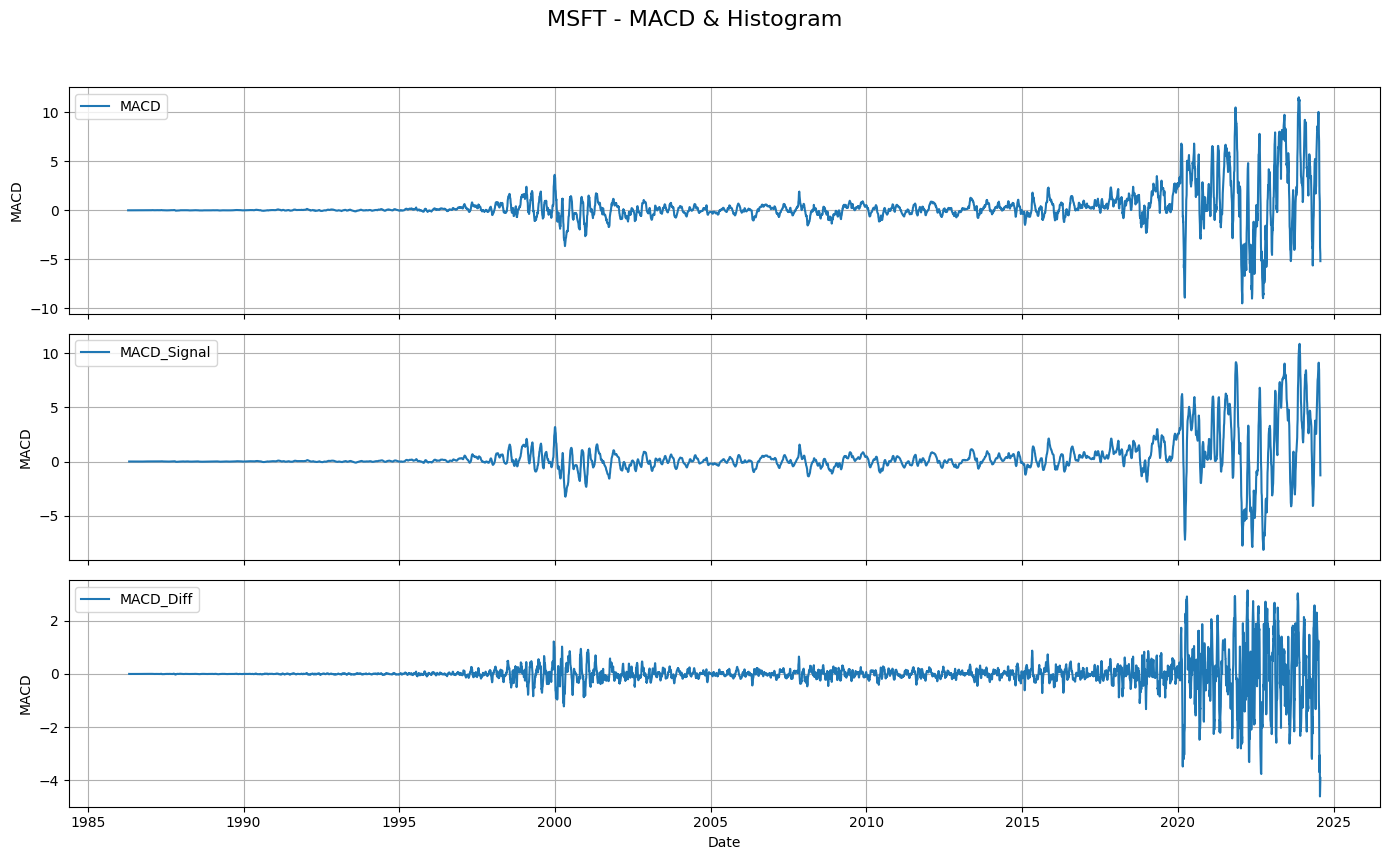

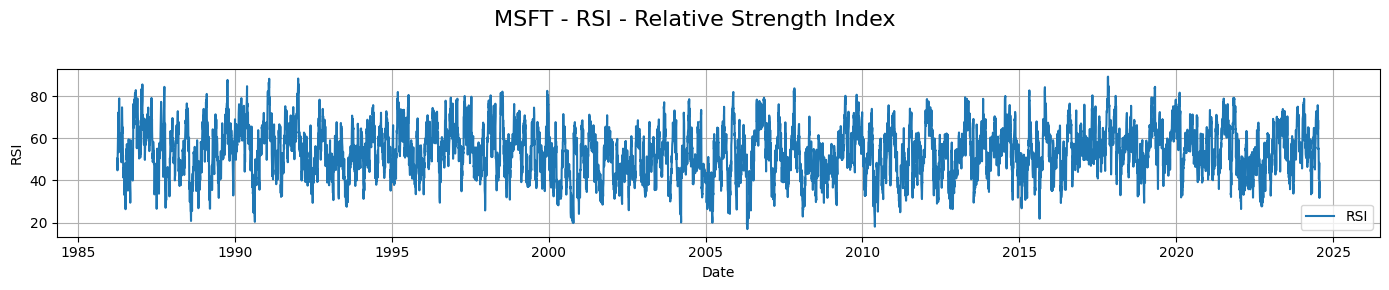

✅ Saved MSFT enriched data to /content/drive/MyDrive/MSFT_enriched.csv


In [10]:
data_dir = os.path.join(extract_path, 'yfinance_data')
csv_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]
analyzers = {}

for file in csv_files:
    ticker = file.split('_')[0]
    path = os.path.join(data_dir, file)
    print(f"\nAnalyzing {ticker}")
    analyzer = StockAnalyzer(ticker, path)
    analyzer.load_and_prepare()
    analyzer.apply_indicators()
    analyzer.plot_all()
    analyzer.save_to_csv()
    analyzers[ticker] = analyzer
